In [71]:
#Let's start with importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv('Bank Marketing Dataset(2).csv') #Reading the data file

In [3]:
data.head() # checking the first five rows from the dataset 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposite
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data['deposite'] = data['deposite'].map({'no': 0, 'yes': 1}) # To change the target col binary to digits
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposite
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [5]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposite'],
      dtype='object')

What are the **features**?
- **age**

- **job** (type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

- **marital** marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

- **education** (categorical:'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- **default:** has credit in default? (categorical: 'no','yes','unknown')

- **housing:** has housing loan? (categorical: 'no','yes','unknown')

- **loan:** has personal loan? (categorical: 'no','yes','unknown')


- **contact:** contact communication type (categorical: 'cellular','telephone')

- **month:** last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

- **day_of_week:** last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

- **duration:** last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.


- **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact)

- **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

- **previous:** number of contacts performed before this campaign and for this client (numeric)

- **poutcome:** outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


- **emp.var.rate:** employment variation rate - quarterly indicator (numeric)
- **cons.price.idx:** consumer price index - monthly indicator (numeric)
- **cons.conf.idx:** consumer confidence index - monthly indicator (numeric)
- **euribor3m:** euribor 3 month rate - daily indicator (numeric)
- **nr.employed:** number of employees - quarterly indicator (numeric)


Output variable (desired target):
- **target value** - has the client subscribed a term deposit? (binary: 'yes','no')

What is the **response?**
 - target value - has the client subscribed a term deposit? (binary: 'yes','no')

In [6]:
data.shape # to check rows and cols

(41188, 21)

In [7]:
data.info() # printing the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
data.isna().sum() # finding the count of missing values from different columns

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposite          0
dtype: int64

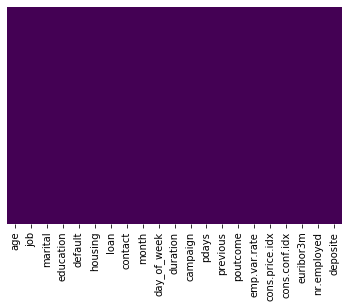

In [9]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis') # check weather null values occur or not.

In [10]:
data.describe() # to describe the data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposite
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [11]:
for line in data.select_dtypes(include='object').columns:
    print(line)
    print(data[line].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']


In [12]:
for column in data.columns:
    print(column,data[column].nunique())

age 78
job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
deposite 2


Explore the categorical feature

In [13]:
categorical_features = [feature for feature in data.columns if ((data[feature].dtypes=='O') & (feature not in ['deposite']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [14]:
for feature in categorical_features:
    print(feature, len(data[feature].unique()))
    #print('This feature is {} and number of categorical is {}'.format(feature, len(data[feature].unique())))

job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3


**Find Categorical Feature Distribution**

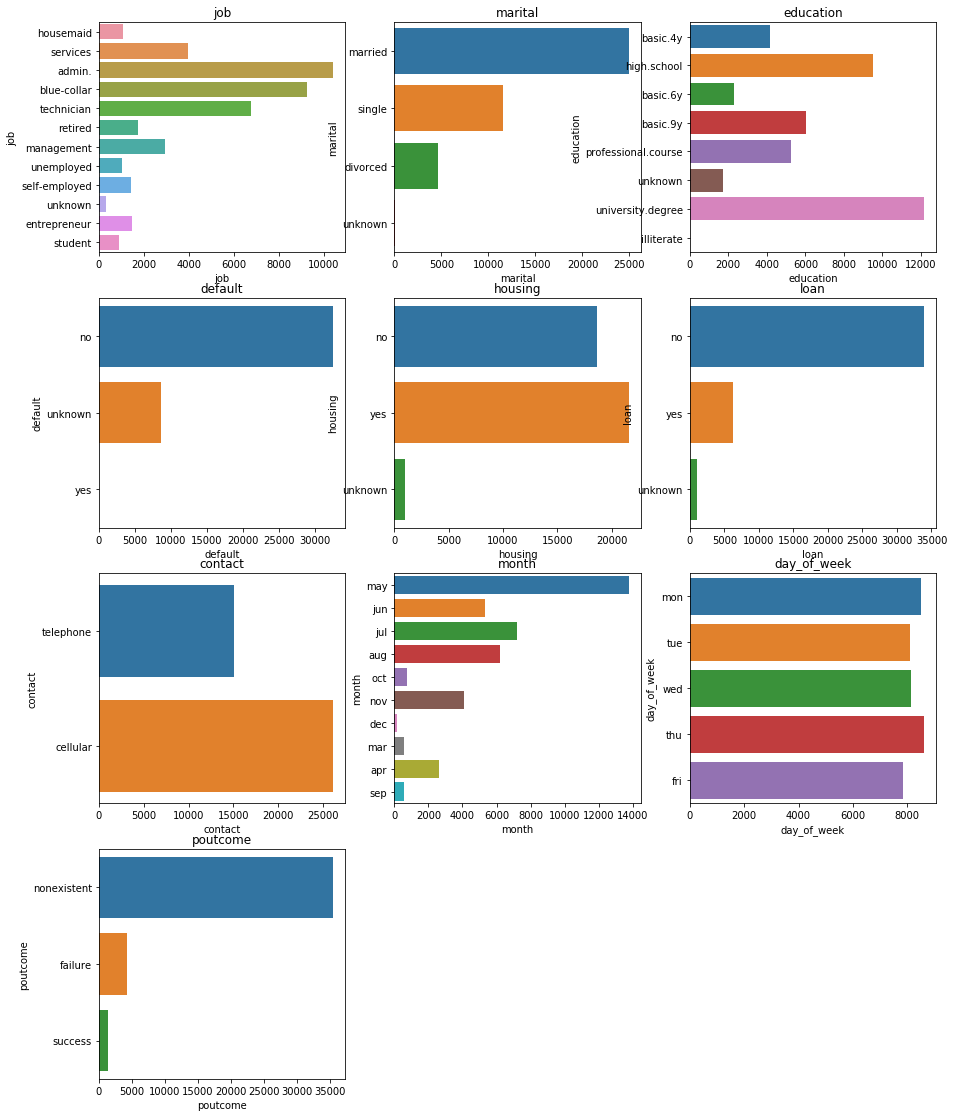

In [15]:
#check count based on categorical features
plt.figure(figsize=(15,60), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=data)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

- client with job type as management records are high in given dataset and housemaid are very less
- client who married are high in records in given dataset and divorced are less
- client whoes education background is secondary are in high numbers in given dataset
- defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop
- data in month of may is high and less in dec

**Relationship between Categorical Features and Label**

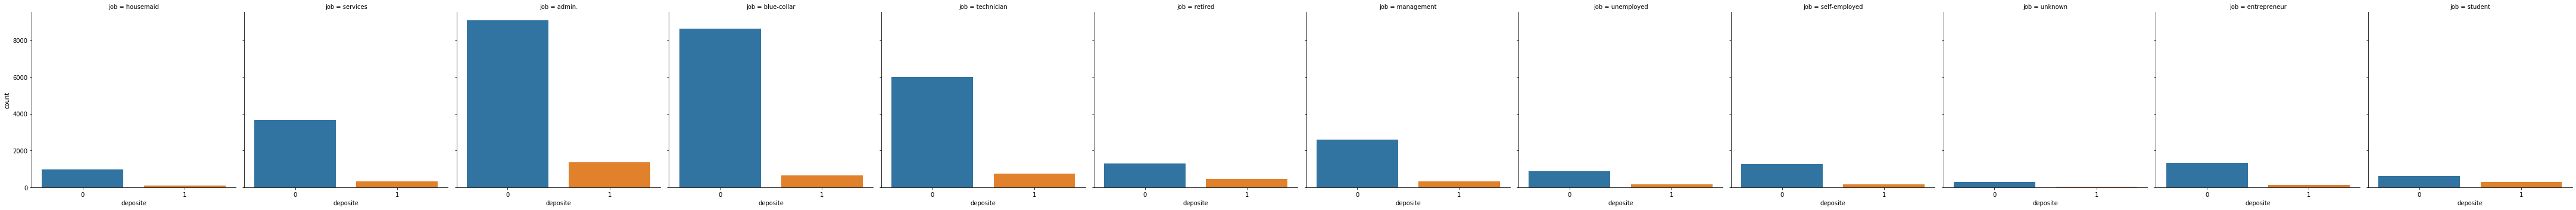

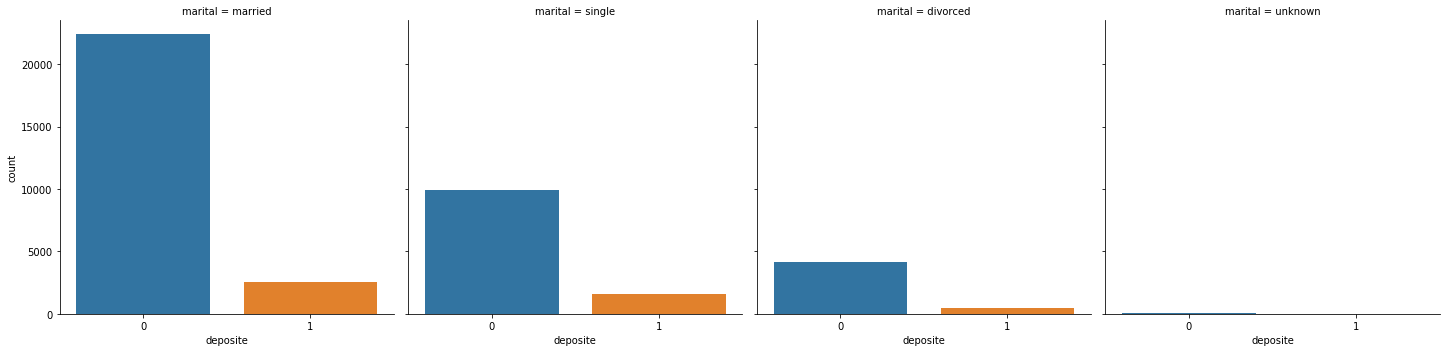

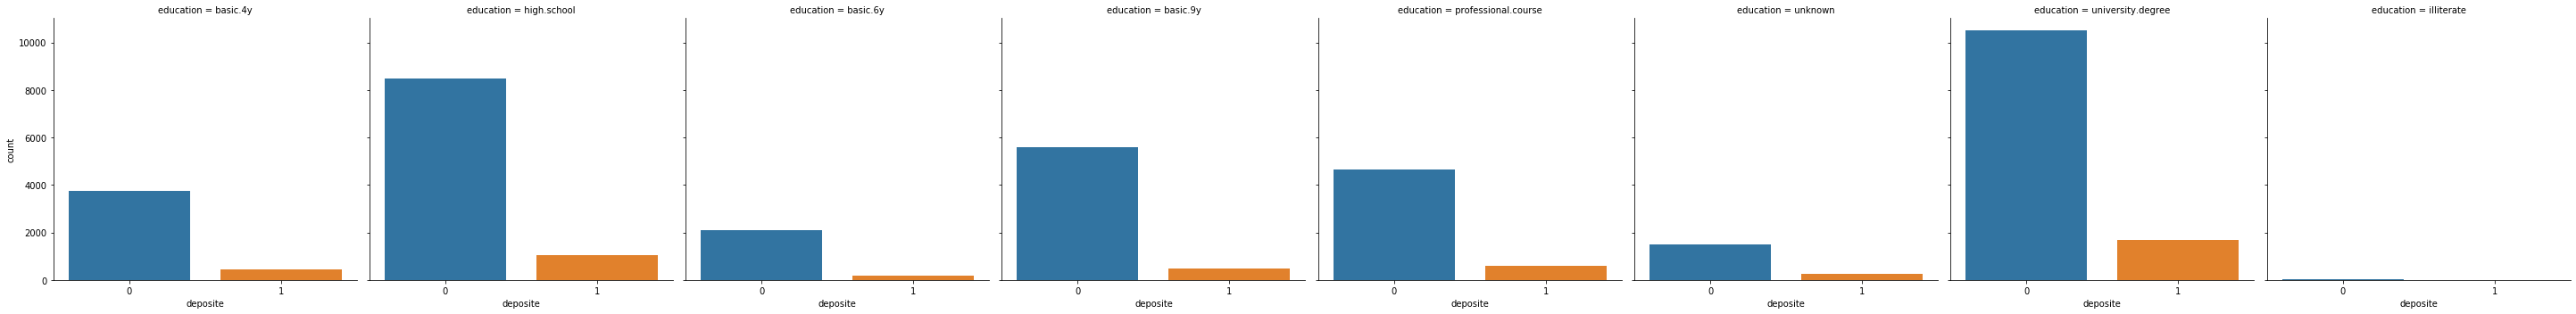

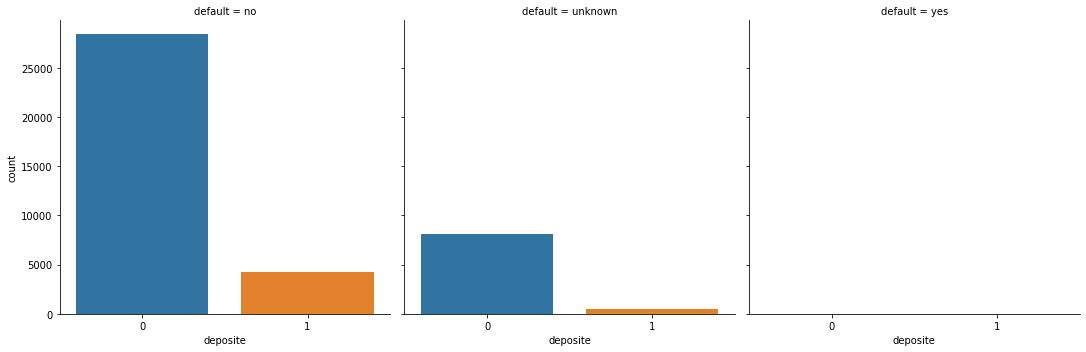

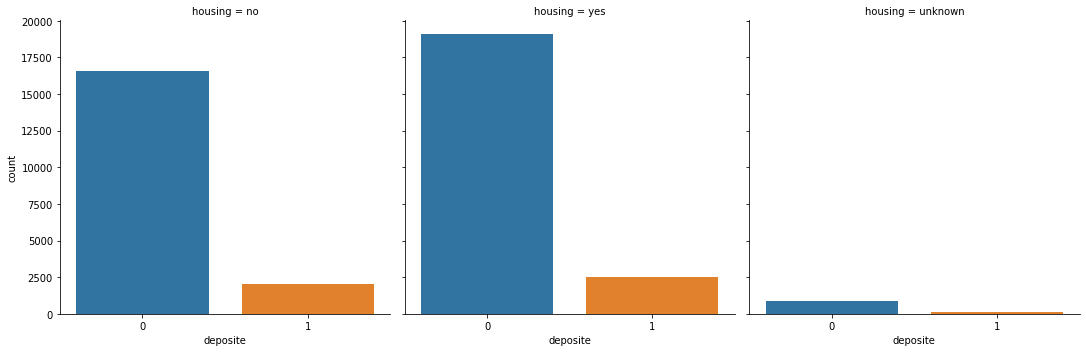

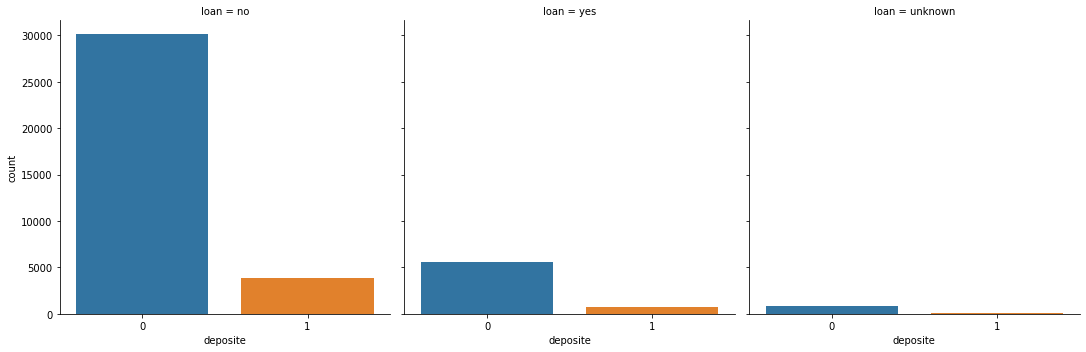

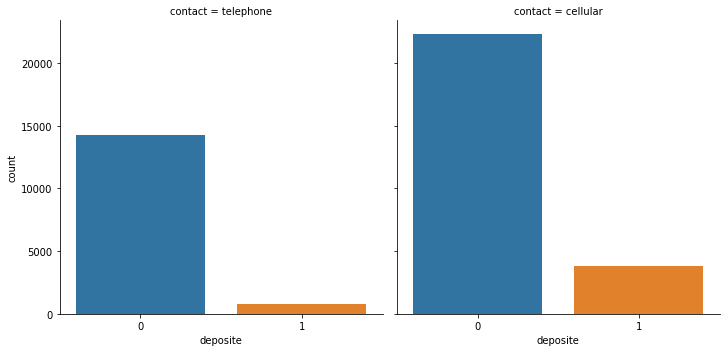

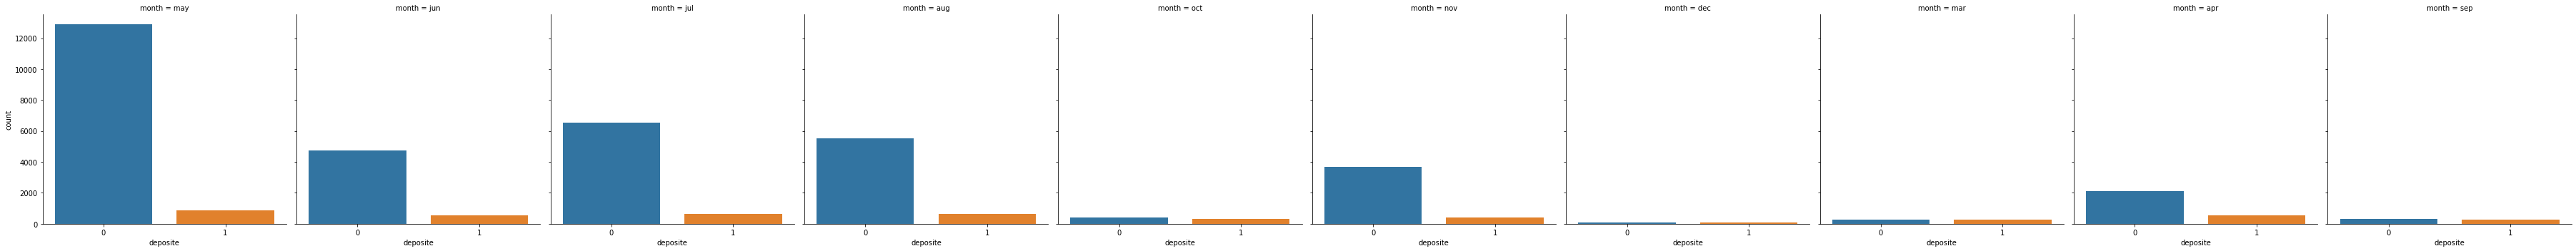

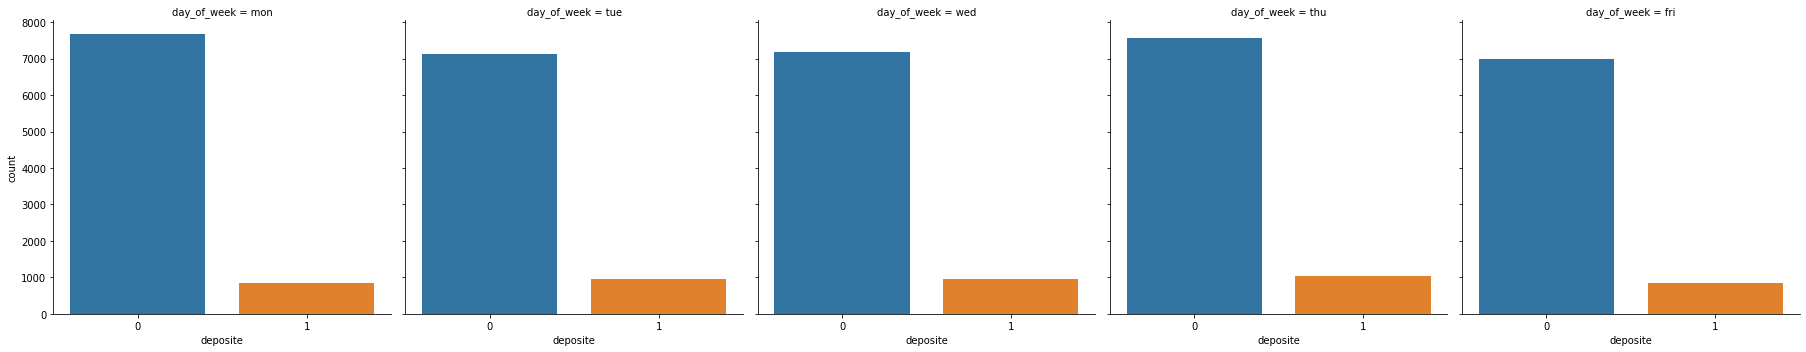

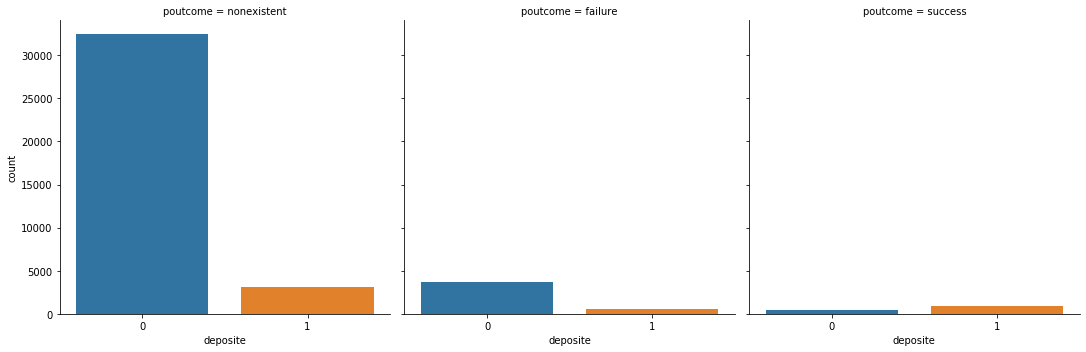

<Figure size 1080x4320 with 0 Axes>

In [16]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable
for categorical_feature in categorical_features:
    sns.catplot(x='deposite', col=categorical_feature, kind='count', data= data)
plt.figure(figsize=(15,60), facecolor='white')
plt.show()

In [17]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(data.groupby(['deposite',categorical_feature]).size())

deposite  job          
0         admin.           9070
          blue-collar      8616
          entrepreneur     1332
          housemaid         954
          management       2596
          retired          1286
          self-employed    1272
          services         3646
          student           600
          technician       6013
          unemployed        870
          unknown           293
1         admin.           1352
          blue-collar       638
          entrepreneur      124
          housemaid         106
          management        328
          retired           434
          self-employed     149
          services          323
          student           275
          technician        730
          unemployed        144
          unknown            37
dtype: int64
deposite  marital 
0         divorced     4136
          married     22396
          single       9948
          unknown        68
1         divorced      476
          married      2532
        

- Admin client has high interest on deposit
- Client who has housing loan seems to be not interested much on deposit
- If pre-campagin poutcome that is poutcome=success then, there is high chance of client to show interest on deposit
- In month of May, Aug, June and July, client show high interest to deposit
- In month of May, records are high but client interst ratio is very less

**Explore the numeric features**

In [18]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if ((data[feature].dtypes != 'O') & (feature not in ['deposite']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


there are 10 numeric features occurs on the dataset

In [19]:
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [20]:
discrete_feature

['previous', 'emp.var.rate', 'nr.employed']

**Find Continous Numerical Features**

In [21]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposite']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


there are 7 continuous numerical features

In [22]:
continuous_features

['age',
 'duration',
 'campaign',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m']

**Distribution of Continous Numerical Features**

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

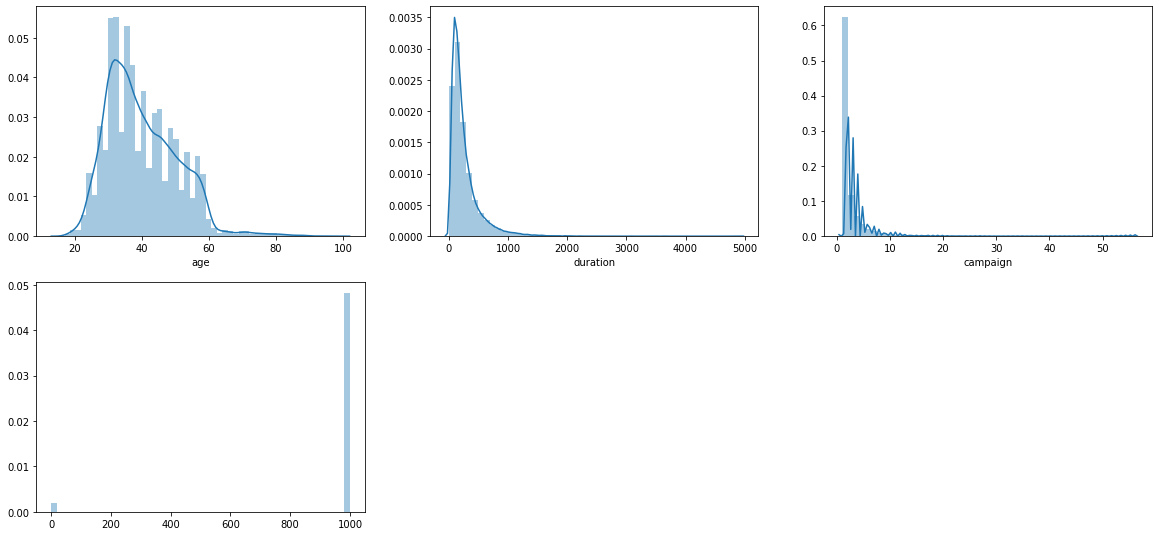

In [23]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

Let's visualize the data and analyze the relationship between independent and dependent variables:

In [ ]:
# let's see how data is distributed for every column
# plt.figure(figsize=(20,25), facecolor='white')
# plotnumber = 1

# for column in data:
#     if plotnumber<=16 :
#         ax = plt.subplot(4,4,plotnumber)
#         sns.distplot(data[column])
#         plt.xlabel(column,fontsize=20)
#         #plt.ylabel('Salary',fontsize=20)
#     plotnumber+=1
# plt.tight_layout()

In [24]:
#y = data['y']
# X =data.drop(columns =['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', \
#                        'pdays', 'previous', 'poutcome', 'y'])

In [25]:
# plt.figure(figsize=(20,30), facecolor='white')
# plotnumber = 1

# for column in X:
#     if plotnumber<=15 :
#         ax = plt.subplot(5,3,plotnumber)
#         plt.scatter(X[column],y)
#         plt.xlabel(column,fontsize=20)
#         #plt.ylabel('y',fontsize=20)
#     plotnumber+=1
# plt.tight_layout()

Relation between Continous numerical Features and Labels

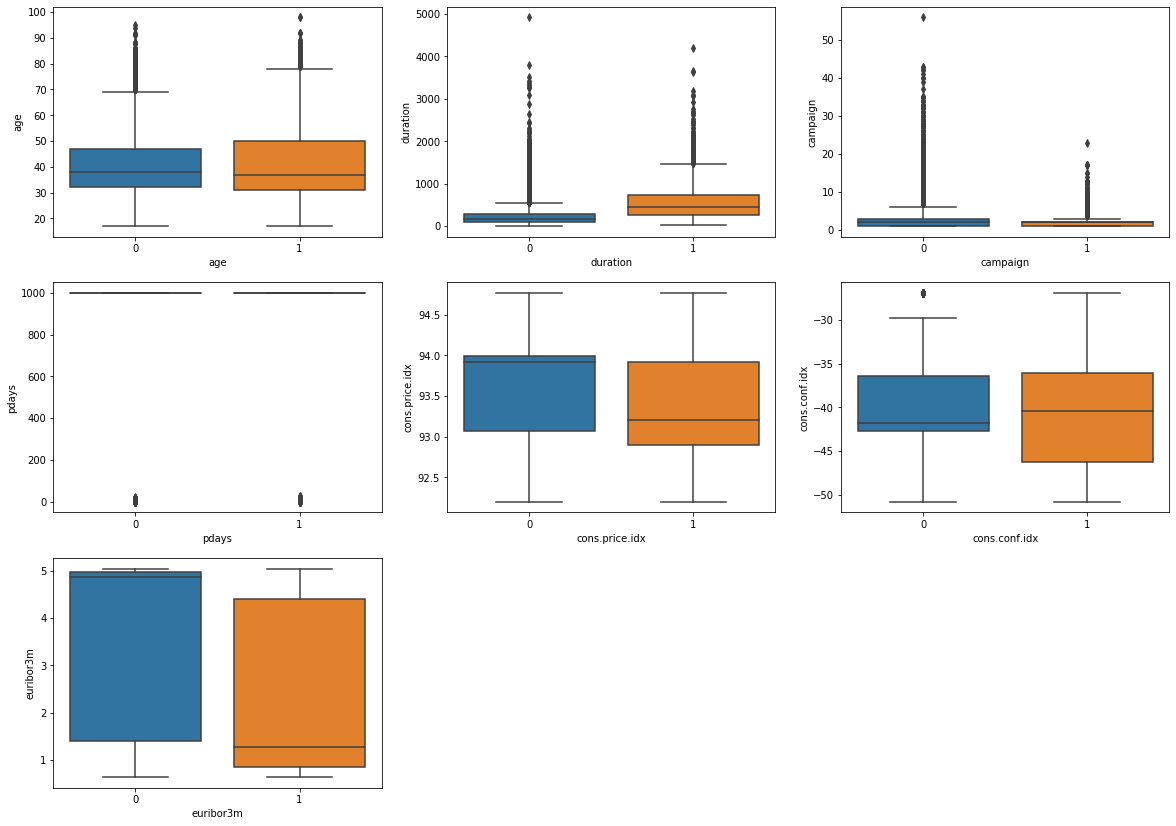

In [27]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="deposite", y= data[feature], data=data)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

client shows interest on deposite who had discussion for longer duration

**Find Outliers in numerical features**

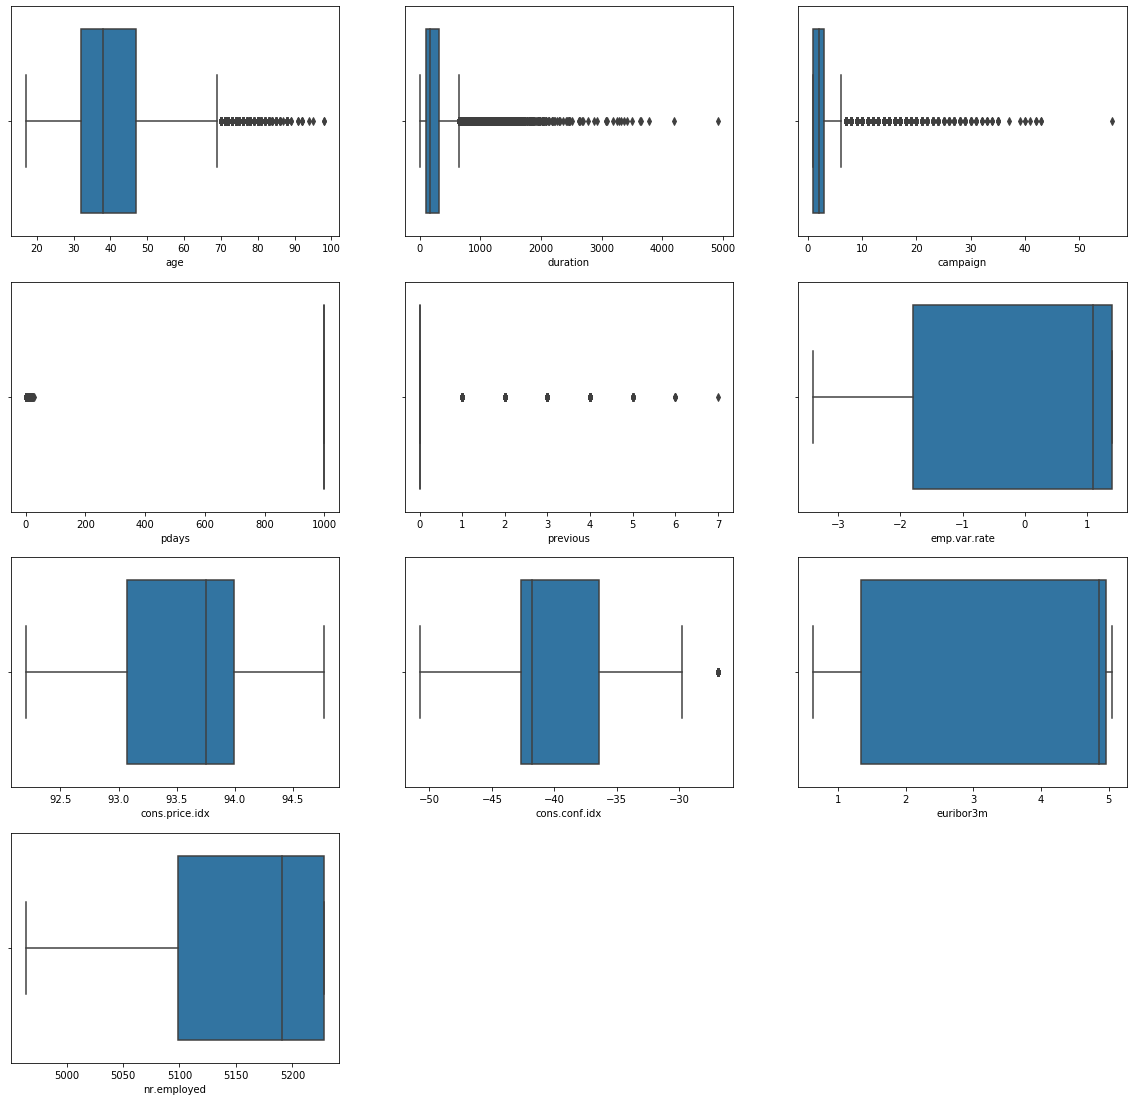

In [28]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

age, duration, campaign, pdays, previous and cons_conf.idx has some outliers

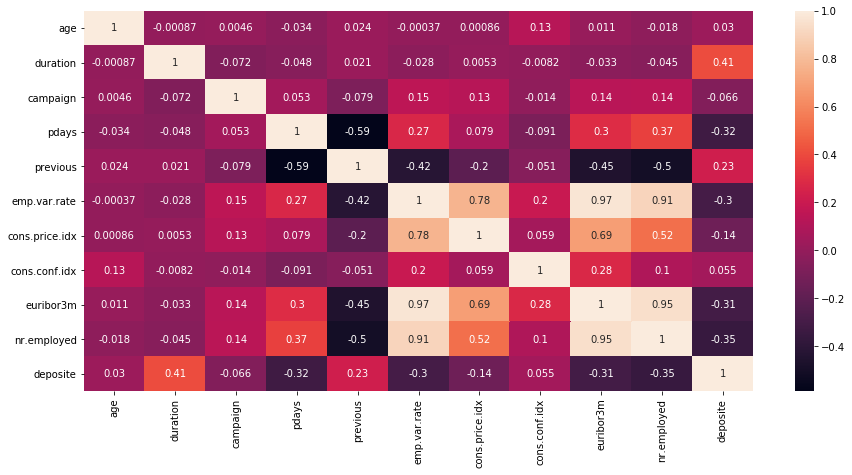

In [29]:
## Checking for correlation
cor_mat=data.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

It seems no feature is heavily correlated with other features

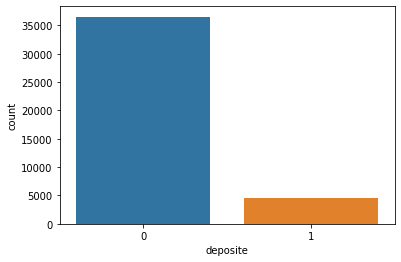

In [30]:
#total patient count based on cardio_results
sns.countplot(x='deposite',data=data)
plt.show()

In [31]:
data['deposite'].groupby(data['deposite']).count()

deposite
0    36548
1     4640
Name: deposite, dtype: int64

In [32]:
data['deposite'].value_counts()*100/len(data)

0    88.734583
1    11.265417
Name: deposite, dtype: float64

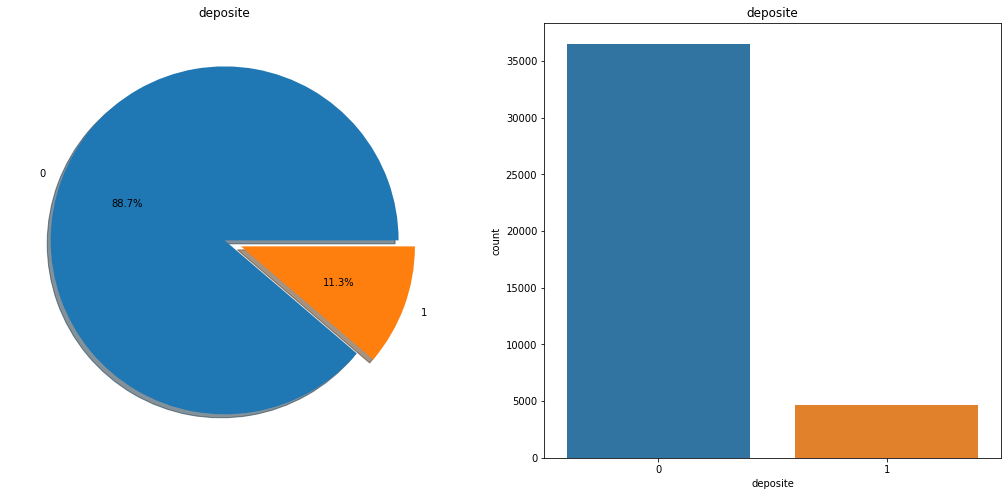

In [33]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['deposite'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('deposite')
ax[0].set_ylabel('')
sns.countplot('deposite',data=data,ax=ax[1])
ax[1].set_title('deposite')
plt.show()

**Feature Engineering**

- Drop unwanted Features
- Handle Missing Values
- Handle Categorical Features
- Handle Feature Scalling
- Remove Outliers

As per Exploratory Data Analysis EDA,

- No missing value found
- No feature found with one value
- 10 categorical features
- defaut features does not play improtant role
- it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)

In [35]:
df1 =data.copy()

In [36]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposite
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [37]:
df1.shape

(41188, 21)

In [38]:
#defaut features does not play imp role
df1.groupby(['deposite','default']).size()

deposite  default
0         no         28391
          unknown     8154
          yes            3
1         no          4197
          unknown      443
dtype: int64

In [39]:
df1.drop(['default'],axis=1, inplace=True)

In [40]:
df1.groupby(['deposite','pdays']).size()

deposite  pdays
0         0            5
          1           18
          2           24
          3          141
          4           55
          5           17
          6          123
          7           20
          8            6
          9           29
          10          22
          11          13
          12          32
          13           8
          14           9
          15           8
          16           5
          17           6
          18           3
          19           2
          20           1
          22           1
          999      36000
1         0           10
          1            8
          2           37
          3          298
          4           63
          5           29
          6          289
          7           40
          8           12
          9           35
          10          30
          11          15
          12          26
          13          28
          14          11
          15          16
         

In [41]:
# drop pdays as it has 99 value for around 60%+ 
df1.drop(['pdays'],axis=1, inplace=True)

In [42]:
# remove outliers in feature age...
df1.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 17 to 99

age
17      5
18     28
19     42
20     65
21    102
     ... 
91      2
92      4
94      1
95      1
98      2
Name: age, Length: 78, dtype: int64

In [43]:
# remove outliers in feature duration...
df1.groupby(['deposite','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

deposite  duration
0         0            4
          1            3
          2            1
          3            3
          4           12
                      ..
1         3094         1
          3183         1
          3631         1
          3643         1
          4199         1
Name: duration, Length: 2562, dtype: int64

In [44]:
# remove outliers in feature campaign...
df1.groupby(['deposite','campaign'],sort=True)['campaign'].count()

deposite  campaign
0         1           15342
          2            9359
          3            4767
          4            2402
          5            1479
          6             904
          7             591
          8             383
          9             266
          10            213
          11            165
          12            122
          13             88
          14             68
          15             49
          16             51
          17             54
          18             33
          19             26
          20             30
          21             24
          22             17
          23             15
          24             15
          25              8
          26              8
          27             11
          28              8
          29             10
          30              7
          31              7
          32              4
          33              4
          34              3
          35              5
 

In [45]:
df2 = df1[df1['campaign'] < 56]

In [46]:
df2.groupby(['deposite','campaign'],sort=True)['campaign'].count()

deposite  campaign
0         1           15342
          2            9359
          3            4767
          4            2402
          5            1479
          6             904
          7             591
          8             383
          9             266
          10            213
          11            165
          12            122
          13             88
          14             68
          15             49
          16             51
          17             54
          18             33
          19             26
          20             30
          21             24
          22             17
          23             15
          24             15
          25              8
          26              8
          27             11
          28              8
          29             10
          30              7
          31              7
          32              4
          33              4
          34              3
          35              5
 

In [47]:
# remove outliers in feature previous...
df2.groupby(['deposite','previous'],sort=True)['previous'].count()

deposite  previous
0         0           32421
          1            3594
          2             404
          3              88
          4              32
          5               5
          6               2
          7               1
1         0            3141
          1             967
          2             350
          3             128
          4              38
          5              13
          6               3
Name: previous, dtype: int64

In [48]:
df3 = df2[df2['previous'] < 56]
#df3

In [49]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome', 'day_of_week']
for col in  cat_columns:
    df3 = pd.concat([df3.drop(col, axis=1),pd.get_dummies(df3[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [50]:
bool_columns = ['housing', 'loan', 'deposite']
for col in  bool_columns:
    df3[col+'_new']=df3[col].apply(lambda x : 1 if x == 'yes' else 0)
    df3.drop(col, axis=1, inplace=True)

In [51]:
df3.head()

,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_sep,poutcome_nonexistent,poutcome_success,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,housing_new,loan_new,deposite_new
0,56,261,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,0,0,0
1,57,149,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,0,0,0
2,37,226,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,1,0,0
3,40,151,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,0,0,0
4,56,307,1,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,1,0,1,0,0,0,0,1,0


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
# Split dataset into Training set (80%) and Test set (20%)
X = df3.drop(['deposite_new'],axis=1)
y = df3['deposite_new']

In [54]:
type(X)

pandas.core.frame.DataFrame

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
len(X_train)

32949

In [57]:
len(X_test)

8238

In [58]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [59]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=RandomForestClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[1. 1. 1. 1. 1.]
1.0


In [61]:
from sklearn.model_selection import cross_val_score
model_score =cross_val_score(estimator=XGBClassifier(),X=X_train, y=y_train, cv=5)
print(model_score)
print(model_score.mean())

[23:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:28:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:28:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [62]:
#create param
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [63]:
#gridsearch
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

[23:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:30:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:31:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:31:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:31:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:31:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:32:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:32:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:32:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:33:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:33:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [64]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 1.0,
  'best_params': {'criterion': 'gini',
   'max_depth': 2,
   'max_features': 'auto',
   'n_estimators': 10}},
 {'model': 'XGBClassifier',
  'best_score': 1.0,
  'best_params': {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 10}}]

In [65]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=10,n_estimators=100)

In [66]:
model_xgb.fit(X_train,y_train)

[23:37:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [67]:
model_xgb.score(X_test,y_test)

1.0

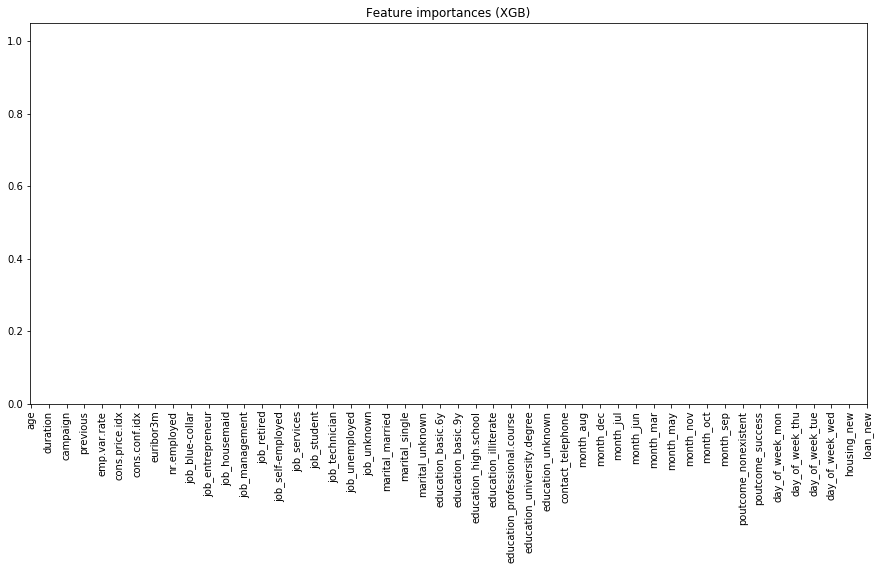

In [68]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train.columns, model_xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
fig = plt.figure(figsize=(15,7))
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()